<a href="https://colab.research.google.com/github/hakuchi-1864/Scrape-simple-test-with-Selenium/blob/main/10_zaman_serileri_tahmini_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow ile Zaman Serileri Tahminleri + Milestone Projesi 3: BitPredict

**Not:** Finansal bir tavsiye değildir.

Bitcoin tarihi verilerine dayanarak TensorFlow ile tahminler oluşturmaya çalışacağız.

Kaynak: (https://finance.yahoo.com/quote/BTC-USD/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANwkmtmw6fYsZRCJWiOWEzNcW1P97l2tXNqh2IzwOTu_L5zoGtupOEPsdY5BwfdkZ0dKRnG5GZhXcwqig9JbolqIO5SCIJ1rC3kXxA-3751hfi8Ojy0XxwksBMvMOM8ZOUCQg86WnWe9HvDpNDv5-oVPYb1YpVDdyEwkUX0OqKH4)

## Verimizi indirelim 

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2023-01-04 18:45:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-01-04 18:45:53 (7.02 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
# Verimizi her bir gün için kapanış fiyatı ile sadeleştirelim
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


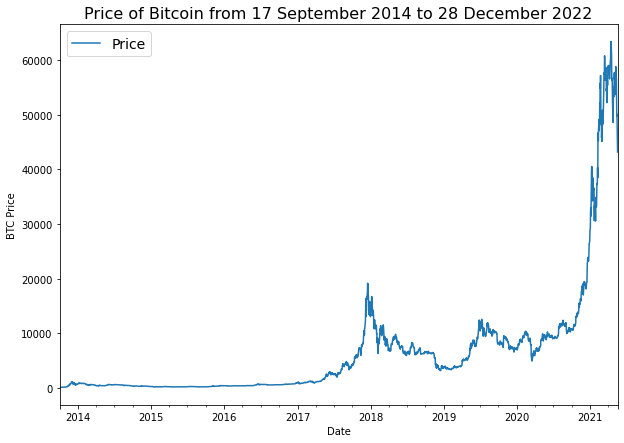

In [7]:
# Görselleştirelim
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 17 September 2014 to 28 December 2022", fontsize=16)
plt.legend(fontsize=14);

## Python kullanarak CSV dosyamızı okuyalım

In [8]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

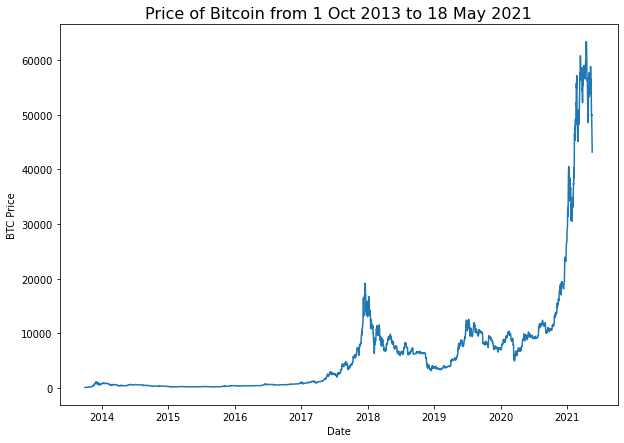

In [9]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

## Time series-zaman serileri için train/test oluşturmanın doğru yolu

sklearn train_test_split random_state ile olan normal işlemi burada uygulamıyoruz. Çünkü amaç belirli bir noktaya kadar olan veriyi- train data olarak eğitip, aynı kontadan sonrakini test olarak kullanmak

In [10]:
# Bitcoin zaman dizi edin
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
# Eğitim ve test verilerini doğru bir şekilde ayırmak
split_size = int(0.8 * len(prices)) # %80 eğitim, %20 test

# Eğitim verisi ayrımı yapmak (split_size'den önceki herşey)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Test verisi ayrımı yapmak(split_size'dan sonraki herşey)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)


(2229, 2229, 558, 558)

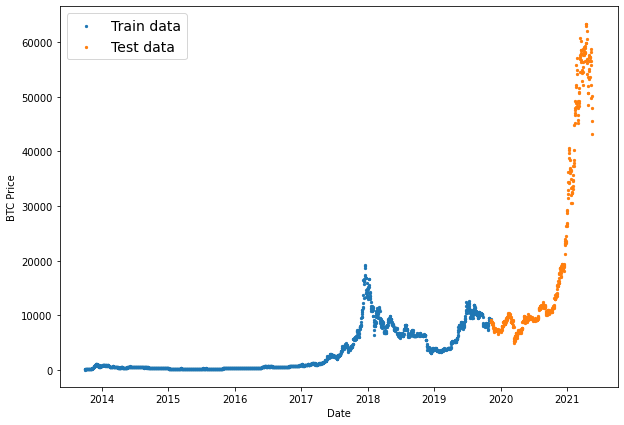

In [13]:
# Görselleştirelim
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [14]:
# Görselleştirme için bir fonksiyon yazalım
def plot_timeseries(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Değerlere karşı (timesteps boyunca bir değerler dizisi) timesteps'i (zaman içinde noktalar serisi) çizer.

  Argümanlar:
    timesteps: timesteps dizisi
    values: zaman boyunca değerler dizisi
    format: varsayılan olarak '.', çizim stili
    start: çizime nereden başlanacak
    end: çizim nerede sona erecek
    label: değerler çizimini göstermek içindir
  """
  # Dizileri görselleştir
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # etiketi daha büyütür
  plt.grid(True)

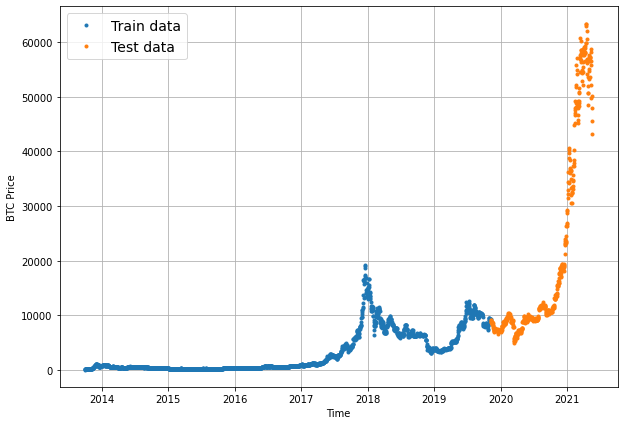

In [15]:
# Test edelim
plt.figure(figsize=(10,7))
plot_timeseries(timesteps=X_train, values=y_train, label="Train data")
plot_timeseries(timesteps=X_test, values=y_test, label="Test data")

## Modelleme Deneyimleri

Elimizde geçmiş bitcoin fiyatları var, onları kullanarak gelecek bitcoin fiyatlarını tahmin etmek için çeşitli modeller oluşturacağız:

* **Horizon** = Geleceği tahmin etmek için timesteps sayısı
* **Window** = Horizon'u tahmin etmek için geçmişte kullanılan timesteps sayısı

İzleyeceğimiz modelleme deneyimleri:

* 0	Naïve model (baseline/temel)	
* 1	Dense model	horizon=1, window=7
* 2	Same as 1, horizon=1, window=30
* 3	Same as 1, horizon=1, window=30
* 4	Conv1D	
* 5	LSTM	
* 6	Same as 1 (but with multivariate data)	
* 7	N-BEATs Algorithm	
* 8	Ensemble (multiple models optimized on different loss functions)	
* 9	Future prediction model (model to predict future values)	
* 10	Same as 1 (but with turkey 🦃 data introduced)	



## Model 0: Naive Forecast(Naif Tahmin)

Formulü: timestep t zamanındaki tahmin(y-hat) = bir önceki timestep (t-1)- horizon=1 için böyledir

In [16]:
# Naif tahmin oluşturalım
naive_forecast = y_test[:-1] #naif tahmin son değer hariç her değere eşittir
naive_forecast[:10], naive_forecast[-10:] # ilk on ve son ona bak

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

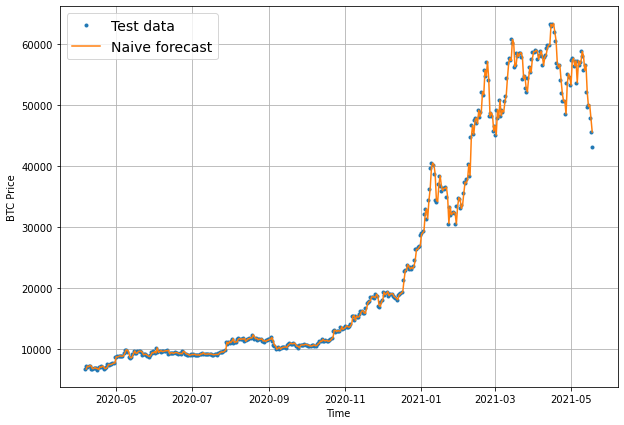

In [17]:
# Naif tahmini görselleştirelim
plt.figure(figsize=(10,7))
#plot_timeseries(timesteps=X_train, values=y_train, label="Train data")
plot_timeseries(timesteps=X_test, values=y_test, start=150, label="Test data")
plot_timeseries (timesteps=X_test[1:], values=naive_forecast, start=150, format="-", label="Naive forecast")

Gördüğümüz gibi naif tahmin şekil olarak son derece uyumlu görünüyor. Ve naif tahmini yenmek zor görünüyor neden? 
kaynak: https://otexts.com/fpp3/accuracy.html

## Timeseries modeli değerlendirelim

Time series forecasting(zaman serisi tahmini) için bazı değerlendirme metriklerine bakalım..

Ne yapıyoruz?

Bir sayı tahmini yapıyoruz. Dolayısıyla bir çeşit regresyon sorunu ile karşı karşıyayız. Bu yüzden regresyon-tarzı metriklere ihtiyacımız olacaktır.

Bir kaç yaygın regresyon metriği(zaman serisi tahminleri içinde kullanılabilir):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE -root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

**Tüm bu metrikler için daha düşük değer daha iyidir** Örneğin MAE 10, MAE 100'den iyidir..

Burada ana değerlendirdiğimiz şey: Modelimizin gerçek değer olan y_true ile kıyaslandığında y_pred tahminleri nasıldır?

In [18]:
import tensorflow as tf

In [19]:
# MASE Uygulaması
def mean_absolute_scaled_error(y_true, y_pred):
  """
  (seasoniality olmadığı varsayılan) MASE uygulamasıdır
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Naif tahminin MAE'sini bulmak(no seasoniality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # 1 gün başına bitcoinleri değerlendiriyoruz

  return mae/mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [21]:
y_test[0].dtype

dtype('float64')

In [22]:
def evaluate_preds(y_true, y_pred):
  """y_true ve y_pred değerlerini alır MAE, MSE, RMSE, sMAPE ve MASE değerlerini hesaplar
  """
  # Metrik hesaplaması için float32 ye çevir
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Çeşitli metrikleri hesaplayalım
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

 

In [23]:
# Naif tahmini test edelim
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results


{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [24]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [25]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [26]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Baseline veya diğer tahminler için kullanılabilir diğer modeller

* Moving average:	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
* ARIMA (Autoregression Integrated Moving Average):	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
* sktime (Scikit-Learn for time series):	https://github.com/alan-turing-institute/sktime
* TensorFlow Decision Forests (random forest, gradient boosting trees):	https://www.tensorflow.org/decision_forests
* Facebook Kats (purpose-built forecasting and time series analysis library by Facebook):	https://github.com/facebookresearch/Kats
* LinkedIn Greykite (flexible, intuitive and fast forecasts):	https://github.com/linkedin/greykite

## Format Data Bölüm 2: Verisetini pencerelemek (window etmek)

Neden window-pencereleme yapıyoruz?

Timeseries veya zaman serilerinden oluşan verimizi supervised learning problemine döndürmek için window işlemi yaparız.

1 hafta windowing yapmak:

[0, 1, 2, 3, 4, 5, 6]-> al -> [7]  7.günü tahmin et

[1, 2, 3, 4, 5, 6, 7]-> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]

In [27]:
# Bitcoin verimizde ne yapmak istiyoruz?
print(f"We want to use: {prices[:7]} to predict this: {prices[7]}")

We want to use: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] to predict this: 123.033


Yani window size-boyut 7 kullanarak horizon=1'i tahmin etmek istiyoruz. Bunun için bir fonksiyon yazacağız...

In [28]:
# Window ve horizon boyutları için global değişkenler oluşturalım
HORIZON = 1 # sonraki günü tahmin ediyoruz
WINDOW_SIZE = 7 # tahmin yapmak için geçmiş bir haftanın bitcoin verilerini kullanıyoruz

In [29]:
# windowed verisini etiketlemek için bir fonksiyon oluşturalım
def get_labelled_windows(x, horizon=HORIZON):
  """windowed veri seti için etiketler oluşturur.
     örnek: Horizon=1 ise
     Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output = ([0, 1, 2, 3, 4, 5, 6],[7])
  """
  return x[:, :-horizon], x[:,-horizon:]

In [30]:
# Test edelim
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


Windowed verimizi etiketlemek için bir yol bulduk. Ancak sadece küçük bir ölçekte kullanılırdır. Tüm timeseries verisi için bunu yapmanın bir yolunu bulmalıyız. Python for döngüsü büyük miktarda timeseries verilerinde yavaşlamaya yol açtığından hızlandırmak için NumPy array indexing kullanacağız.
https://numpy.org/doc/stable/user/basics.indexing.html

Fonksiyonumuz şu işleri yapacak:

1. Belirli bir window boyutunda bir window adımı oluşturun

(örneğin: [[0, 1, 2, 3, 4, 5, 6])

2. Çoklu window adımlarının 2D dizinini oluşturmak için NumPy indexing kullan, örneğin:

[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]

3. Bitcoin tarihi fiyatları- yani hedef seriler üzerinde indexleme yapmak için 2.adımda oluşturduğumuz çoklu window adımları 2D dizini kullan.

4. Yukarıdaki windows adımlarını get_labelled_windows() foksiyonumuzu kullanarak belirli bir horizon ile windowslar haline dönüştürür.

**Kaynak:** Oluşturacağımız fonksiyonu ilgili linkten adapte ettik. https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5



In [31]:
import numpy as np
# NumPy dizilerini windows olarak görüntülemek için fonksiyon oluştur
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Belirli bir window boyutunda bir window adımı oluşturun.(daha sonra etiketlemek için horizon'u sona ekle)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Çoklu window adımlarının 2D dizinini oluşturmak için NumPy indexing kullan(0 index için -1 koyuyoruz-sonda out of index range olmasın)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
  #print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Bitcoin tarihi fiyatları- yani hedef seriler üzerinde indexleme yapmak için 2.adımda oluşturduğumuz çoklu window adımları 2D dizini kullan
  windowed_array = x[window_indexes] # (x, window_size=WINDOW_SIZE, horizon=HORIZON)-> price değerinin indeksi
  #print("------")
  #print(windowed_array)
  # 4. Yukarıdaki windows adımlarını get_labelled_windows() foksiyonumuzu kullanarak belirli bir horizon ile windowslar haline dönüştürür.
  windows, label = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, label




In [32]:
full_windows, full_labels= make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [33]:
len(prices)

2787

In [34]:
# İlk 3 windows/labels'e bakalım
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [35]:
# Son 3 windows/labels'e bakalım
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [36]:
prices[-1]

43144.4712908603

https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array adresinde fonksiyonumuzun işlevini yapan kod mevcuttur.

## Windowslarımızı eğitim ve test verilerine dönüştürelim


In [37]:
# Eğitim ve test diye ayıralım
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Eşleşen windows ve labels çiftlerini eğitim ve test verisi olarak ayırır
  """
  split_size = int(len(windows) * (1-test_split)) # %80 eğitim %20 test oluşturacaktır
  train_windows = windows[:split_size]
  test_windows = windows[split_size:]
  train_labels = labels[:split_size]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [38]:
# Eğitim ve test windowsları oluşturalım
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [39]:
# İlk 5 training windows ve labels bakalım
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [40]:
test_windows[:5], test_windows[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
      

In [41]:
# Train labels windows split yaptıktan önce ve sonra aynı mı(kıyaslamak için shape aynı olmalı)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## ModelCheckPoint callback oluşturalım

Her bir modelimizin en iyi performansının, diğer modelimizin en iyi performansı ile karşılaştırmak istiyoruz. Örneğin modelimiz 100 epochs eğitim değerine rağmen 55.epoch ta en iyi performansı verdiyse onu kaydeder.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [42]:
import os
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)


## Model 1: Dense model(window = 7, horizon=1):

İlk derin modelimiz basit bir dense model olacak şöyle ki:
* 128 hidden unit ve relu ile tek bir dense katman
* linear activation(no activation) ile bir çıktı katmanı
* Adam optimization ve MAE kayıp değer fonksiyonu
* Batch boyutu 128(daha önce 32 idi)
* 100 epoch öğrenim süresi

Söz konusu sayılar deneyimlerden elde edildi:

Bunlar **Hyperparameter** - makine öğrenimi uygulayıcısı bu değerleri ayarlayabilir
**Parameter** modelin kendi başına öğrendiği değerlerdir-weights

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

# Mümkün olduğunca tekrarlanabilir sonuçlar için random seed kuracağız
tf.random.set_seed(42)

# 1. Modeli inşa et
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear"), # linear = no activation
], name="model_1_dense")

# 2. Derle
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Uyarla
history_model_1 = model_1.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              verbose=0,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])


In [44]:
# Test verisinde değerlendirelim
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [45]:
# Performansı yüksek kayıtlı modeli yükleyip model_checkpoint_callback'in faydasını görelim
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

In [46]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model ile test verimiz üzerinde tahminler yapacağız
Test verisinde tahmin yapmak için bir fonksiyon yazacağız(test setimiz gerçek veri üzerinden değil sözde test verisi dikkat et)

1. Bir train model al
2. Bazı veriler yükle-input et(modeli eğittiğimiz veriye uygun veri olmalı)
3. Verileri modelin predict fonksiyonundan geçir
4. Predictions-tahminleri return et

In [47]:
def make_preds(model, input_data):
  """
   model.predict kullanarak input data'dan tahminler yapar.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # Tahminleri 1D dizinler şeklinde görmek için

In [48]:
# Modelimizi test verisi üzerinde tahminler yapmak için kullanalım
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10], len(model_1_preds)

18/18 [==============================] - 0s 1ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>, 556)

In [49]:
# Preds-tahminleri değerlendirelim
model_1_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_1_preds)

model_1_results

{'mae': array([11928.928 , 11795.89  , 11974.975 , 11948.294 , 11954.369 ,
        12005.417 , 12095.947 , 12114.574 , 12074.43  , 12274.317 ,
        12328.176 , 12355.669 , 12659.421 , 12910.016 , 12878.644 ,
        13093.804 , 12949.453 , 13008.312 , 12720.619 , 12814.96  ,
        12581.029 , 12707.598 , 12820.861 , 12856.262 , 12869.6875,
        12947.9375, 12808.818 , 12728.705 , 12714.618 , 12702.0625,
        12856.51  , 12927.327 , 12960.658 , 12967.021 , 12928.017 ,
        13054.391 , 13032.356 , 13233.181 , 13509.827 , 12790.818 ,
        13002.818 , 13009.271 , 12891.539 , 12929.483 , 12987.1045,
        12930.544 , 12948.6875, 12972.472 , 12937.094 , 12872.536 ,
        12818.355 , 12918.38  , 12975.586 , 12979.919 , 13169.246 ,
        12887.849 , 12853.178 , 12845.988 , 12591.282 , 12378.129 ,
        12360.25  , 12528.331 , 12347.686 , 12353.041 , 12309.105 ,
        12329.121 , 11962.126 , 11905.699 , 11974.919 , 11866.165 ,
        11859.347 , 12016.111 , 12007.854

In [50]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [51]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.9994894}

In [52]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [53]:
X_test[:5]

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [54]:
test_windows[:5]

array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
        9335.75240233, 9226.48582088, 8794.35864452],
       [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
        9226.48582088, 8794.35864452, 8798.04205463],
       [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
        8794.35864452, 8798.04205463, 9081.18687849],
       [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
        8798.04205463, 9081.18687849, 8711.53433917],
       [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
        9081.18687849, 8711.53433917, 8760.89271814]])

In [55]:
X_test[-len(test_windows):] # shape'ler tutsun diye yaptık

array(['2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000',
       '2019-11-18T00:00:00.000000000', '2019-11-19T00:00:00.000000000',
       '2019-11-20T00:00:00.000000000', '2019-11-21T00:00:00.000000000',
       '2019-11-22T00:00:00.000000000', '2019-11-23T00:00:00.000000000',
       '2019-11-24T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-11-26T00:00:00.000000000', '2019-11-27T00:00:00.000000000',
       '2019-11-28T00:00:00.000000000', '2019-11-29T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-02T00:00:00.000000000', '2019-12-03T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-12-07

In [56]:
test_labels.shape

(556, 1)

test_labels[:,0] => (556,1)'den ilk sırayı (556) al ve indeks=0 (556) değerlerini al

In [57]:
model_1_preds.shape

TensorShape([556])

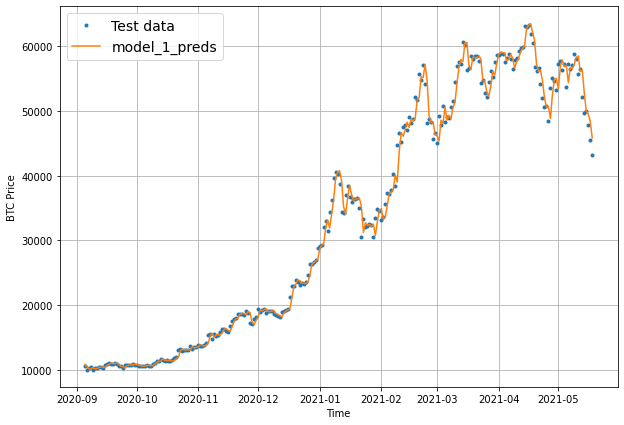

In [58]:
# Model_1 preds- görselleştirelim
offset = 300 # zoom için
plt.figure(figsize=(10, 7))

# test_window ofsetini hesaba kat ve çizimin doğruluğunu sağlamak için test_labels'e indeksle
plot_timeseries(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_timeseries(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


## Model 2: Dense horizon=1, window=30

In [59]:
HORIZON = 1
WINDOW_SIZE = 30

In [60]:
# Horizon ve windows size'e uygun windowed data yapalım
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [61]:
# Train ve test windowsları oluşturalım
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [62]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [63]:
# Model 2'yi oluşturalım
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

history_model_2 = model_2.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              batch_size=128,
                              verbose=0,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_2.name)])


In [64]:
# Model_2 test verisi üzerinde değerlendirelim
model_2.evaluate(test_windows, test_labels)
                 

18/18 [==============================] - 0s 2ms/step - loss: 659.3332 - mae: 659.3332 - mse: 1397247.7500


[659.3331909179688, 659.3331909179688, 1397247.75]

In [65]:
#  Kayıtlı model_2 yüksek performans modeli değerlendirelim
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)




18/18 [==============================] - 0s 3ms/step - loss: 605.8741 - mae: 605.8741 - mse: 1273360.7500


[605.8740844726562, 605.8740844726562, 1273360.75]

In [66]:
# Modelimizi test verisi üzerinde tahminler yapmak için kullanalım
model_2_preds = make_preds(model_2, test_windows)
model_2_preds[:5], len(model_2_preds)

18/18 [==============================] - 0s 1ms/step


(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8882.84 , 8904.423, 8762.442, 8559.087, 8428.983], dtype=float32)>,
 552)

In [67]:
# Preds-tahminleri değerlendirelim
model_2_results= evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_2_preds)

model_2_results


{'mae': 605.8741,
 'mse': 1273360.8,
 'rmse': 1128.4329,
 'mape': 2.726445,
 'mase': 1.0590738}

In [68]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.9994894}

In [69]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

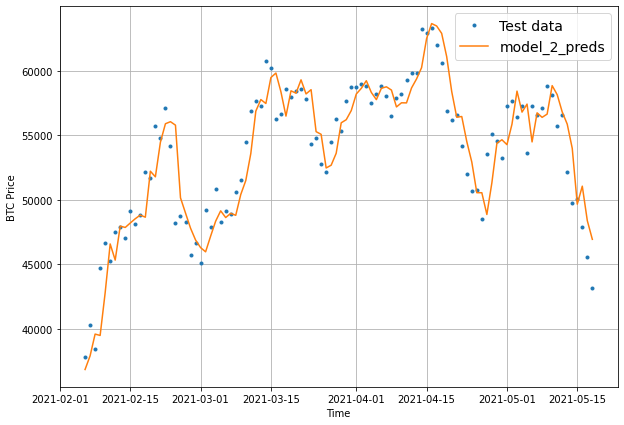

In [70]:
# Model_2 preds- görselleştirelim
offset = 450 # zoom için
plt.figure(figsize=(10, 7))

# test_window ofsetini hesaba kat ve çizimin doğruluğunu sağlamak için test_labels'e indeksle
plot_timeseries(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_timeseries(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense, Window= 30 Horizon=7

In [71]:
HORIZON = 7
WINDOW_SIZE = 30

In [72]:
# Horizon ve windows size'e uygun windowed data yapalım
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [73]:
# Train ve test windowsları oluşturalım
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [74]:
# Model 3 oluşturalım
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)   
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

history_model_3 = model_3.fit(train_windows,
                              train_labels,
                              epochs=100,
                              batch_size=128,
                              verbose=0,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [75]:
# Model 3'ü test verisi üzerinden değerlendirelim
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1525


1300.1524658203125

In [76]:
# Model 3'ün kayıtlı en iyi performans göstereni yükleyip değerlendirelim
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065


1237.5064697265625

In [77]:
# Modelimizi test verisi üzerinde tahminler yapmak için kullanalım
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:3], len(model_2_preds)

18/18 [==============================] - 0s 1ms/step


(<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
 array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
         9357.3545],
        [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
         9156.818 ],
        [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
         9042.725 ]], dtype=float32)>, 552)

In [78]:
test_labels.shape, model_3_preds.shape

((551, 7), TensorShape([551, 7]))

In [79]:
# Preds-tahminleri değerlendirelim
model_3_results= evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_3_preds)

model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53305 ,
         537.854   ,  545.6617  ,  485.9228  ,  584.49713 ,  687.38214 ,
         836.2264  ,  755.1577  ,  731.4957  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80217 ,  188.10799 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.81473 ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78879 ,  190.8118  ,  179.15994 ,  228.26018 ,
         314.44022 ,  379.09244 ,  278.32526 ,  295.3471  ,  299.3852  ,
         248.64983 ,  299.75662 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.9412  ,
          54.825542,   73.79548 ,  103.60128 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57199 ,  146.91267 ,  240.42912 ,
         351.00662 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98102 ,  277.29486 ,  301.8247  ,  455.718   ,
         458.96017 ,  503.4438  ,  522.3119 

In [80]:
model_1_preds.shape, model_2_preds.shape, model_3_preds.shape

(TensorShape([556]), TensorShape([552]), TensorShape([551, 7]))

In [81]:
model_3_results["mae"].shape, model_3_results["mae"].ndim

((551,), 1)

In [82]:
model_2_results["mae"].shape, model_2_results["mae"].ndim

((), 0)

In [83]:
# Evaluation fonksiyonumuz daha çok boyuttaki horizon değerleri(çıktı) için ayarlayalım
def evaluate_preds(y_true, y_pred):
  """y_true ve y_pred değerlerini alır MAE, MSE, RMSE, sMAPE ve MASE değerlerini hesaplar
  """
  # Metrik hesaplaması için float32 ye çevir
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Çeşitli metrikleri hesaplayalım
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Farklı boyutlarda metrikleri dikkate almak için (daha uzun horizonlar için tek sayıya azalt)
  if mae.ndim > 0: # mae eğer skalar değilse, tensörlerin ortalama değerini alarak bire indirge
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [84]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mse': 5405198.5,
 'rmse': 1425.7478,
 'mape': 5.5588784,
 'mase': 2.2020733}

In [85]:
model_2_results

{'mae': 605.8741,
 'mse': 1273360.8,
 'rmse': 1128.4329,
 'mape': 2.726445,
 'mase': 1.0590738}

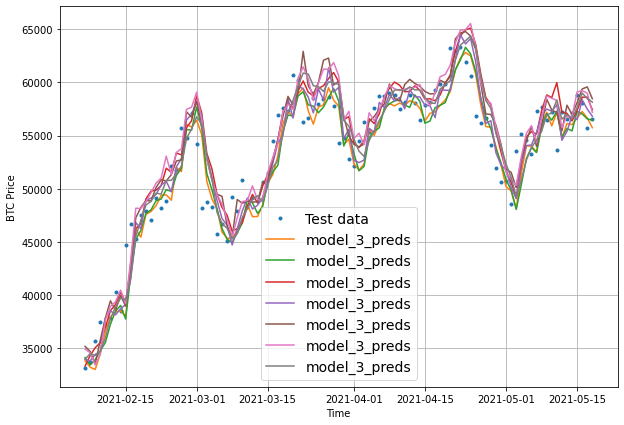

In [86]:
# Model_3 preds- görselleştirelim
offset = 450 # zoom için
plt.figure(figsize=(10, 7))

# test_window ofsetini hesaba kat ve çizimin doğruluğunu sağlamak için test_labels'e indeksle
plot_timeseries(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_timeseries(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, format="-", label="model_3_preds")

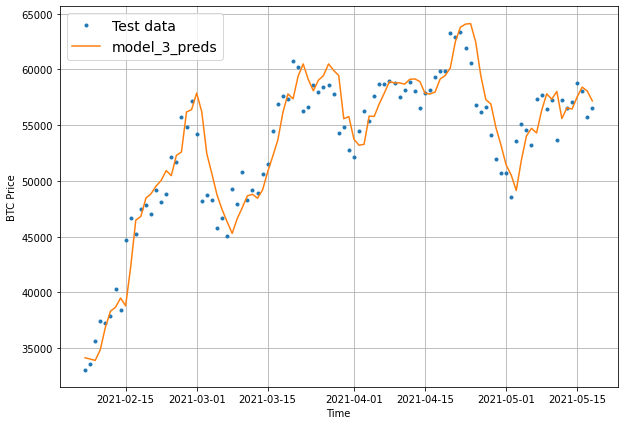

In [87]:
# Model_3 preds- görselleştirelim
offset = 450 # zoom için
plt.figure(figsize=(10, 7))

# test_window ofsetini hesaba kat ve çizimin doğruluğunu sağlamak için test_labels'e indeksle
plot_timeseries(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, format=".", label="Test data")
plot_timeseries(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format="-", label="model_3_preds")

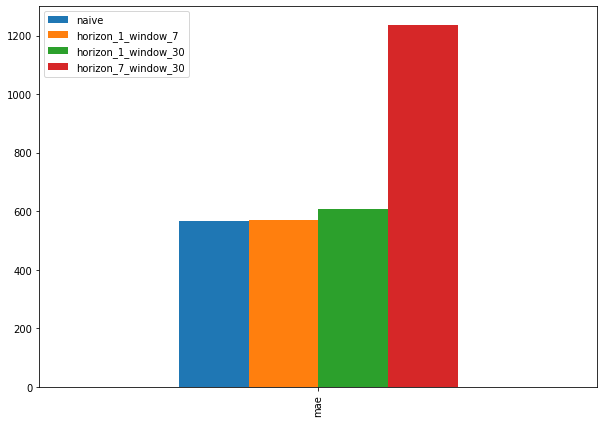

In [88]:
## Modellerimiz için en iyi performansı veren model hangisi, görselleştirelim
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar");

Gördüğümüz gibi naive modelimiz daha düşük mae değeri verdiğinden en iyi performans göstereni, onu horizon=1 window=7 modeli izliyor. Bunun nedeni, veride otokorelasyon mevcudiyeti olabilir. Time series veride otokorelasyon olması şu demektir, sonraki timestep yani t+1 değerinin mevcut timestep'e yakın değerde olmasıdır. Bir diğer deyişle bugünün tahmin değeri, dünün tahmin değerine oldukça yakındır. Dolayısıyla naive model tahmini oldukça iyi sonuç vermekle birlikte, güvenilir değildir.

Otokorelasyonun bir modelin tahminlerine etkisi hakkında ayrıntılı bilgi almak için: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [89]:
HORIZON = 1 # ertesi günün Bitcoin fiyatını tahmin edeceğiz
WINDOW_SIZE = 7 # bir önceki haftanın Bitcoin fiyatlarını kullanarak

In [90]:
# Windowed seti oluşturalım
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [91]:
# Train/test ayrımı yap
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

## Conv1D tabakası kullanacağımız için input shape'in doğru olduğundan emin olmalıyız

TensorFlow'da Conv1D tabakasının inputu: (batch_size, timesteps, input_dim)

* timesteps = WINDOW_SIZE->features(özellikler) bir önceki 7 günlük Bitcoin fiyatları.

* input_dim = HORIZON

timesteps boyutu hazırdır ancak input_dim boyutunu ayarlamamız gerekiyor

In [92]:
# Verimizin shape'ine bakalım
train_windows[0].shape

(7,)

In [93]:
# Verimizi Conv1D katmanına geçeceğiz ancak öncesinde çalışmasını sağlamak için reshape etmeliyiz
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [94]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # input_dim için ilave bir boyut ekler

In [95]:
# Lambda katmanını test edelim
print(f"Original shape: {x.shape}") # WINDOW_SIZE
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")


Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [96]:
tf.random.set_seed(42)

# 1. Model oluştur
model_4 = tf.keras.Sequential([
    # inputları yeniden şekillendirmek için lambda katmanı oluşturmamız gerekiyor, bu katman olmazsa model hata verecektir
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # windows boyutunu ayarlamak için inputları yeniden boyutlandır / Conv1D 3D input gerektirir
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# 2. Derle
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 3. Uyarla
history_model_4 = model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [97]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Test verisi üzerinden modeli değerlendirelim
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 610.1541


610.154052734375

In [99]:
# Model 4'ün en iyi performans verenini yükleyip bakalım
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.8284


570.828369140625

In [100]:
# Tahminler yapalım
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627], dtype=float32)>

In [101]:
# Tahminleri değerlendirelim
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.82837,
 'mse': 1176671.2,
 'rmse': 1084.7448,
 'mape': 2.5593357,
 'mase': 1.0027874}

## Model 5: RNN(LSTM)

Time series- zaman serisi verimiz için RNN kuracağız. Window_size=7, horizon=1 olacak

In [102]:
tf.random.set_seed(42)

# Fonksiyonel API ile bir LSTM modeli kuralım
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Derle
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Uyarla
history_model_5 = model_5.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 3s 113ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
18/18 [==============================] - 2s 97ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
18/18 [==============================] - 2s 101ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
18/18 [==============================] - 2s 115ms/step - loss: 181.9180 - val_loss: 966.6431
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
18/18 [==============================] - 2s 100ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
18/18 [==============================] - 2s 96ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 157.6712 - val_loss: 914.8642
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 166.5143 - val_loss: 1079.0776
Epoch 10/100
18/18 [==============================] - 2s 1

LSTM katmanının default verisinde activation=tanh idi, aldığımız değerler 20-30 bin gibi yüksek değerler çıktı biz "relu" yaptık istediğimizi elde ettik..

In [103]:
# Model 5'in en iyi performansını yükleyip test verisi üzerinden değerlendirelim
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.7563


594.75634765625

In [104]:
# Tahminler yapalım
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8978.832, 8811.05 , 8997.982, 8837.677, 8731.77 ], dtype=float32)>

In [105]:
# Model 5 tahminleri değerlendirelim
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)

model_5_results

{'mae': 594.7564,
 'mse': 1267878.5,
 'rmse': 1126.0011,
 'mape': 2.6723645,
 'mase': 1.0448223}

Nöral ağlar çok güçlü algoritmalardır ki hemen her problemde kullanılabilirler. Ancak performans vereceği veya her zaman kullanışlı olacağı demek değildir.

## Çok değişkenli time serie veri seti oluşturacağız

Bitcoin fiyatları opensistem olduğu için sınırsız etkeni olabilir, ve dolayısıyla time serilerimize özellikler ekleyebiliriz, örneğin bitcoin fiyatları ile ilgili birinin attığı tweetler bir özellik olabiir,

gün 1- 0
gün 2 - 1 tweet
gün 3- 0 vb.

Peki kullanmak için daha iyi özellik nedir?

Örneğin bitcoin halving events nasıl olurdu?
https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

halving events de bitcoin arzı yarıya indirildiğinden halving events den sonra bitcoin fiyatlarının artması daha olası görülüyor. Bu özelliği kodlayarak modelimize ilave etmeye çalışacağız


In [106]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [107]:
# Bitcoin halving events'i bitcoin_prices verimize ekleyelim
block_reward_1 = 50 # 3 Ocak 2009 - verisetimizde yok verisetimiz 2013'de başlıyor
block_reward_2 = 25 # 8 Kasım 2012
block_reward_3 = 12.5 # 9 Temmuz 2016
block_reward_4 = 6.25 # 18 Mayıs 2020

# Block reward tarihleri
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [108]:
block_reward_2_datetime

numpy.datetime64('2012-11-08')

In [109]:
# Belirli bir block_reward değerinin tarih aralığını ne olmalıdır? Bunu bularak indeksimizi oluşturacağız
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [110]:
# block_reward sütunu ekleyelim
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,None
2013-10-02,125.455000,None
2013-10-03,108.584830,None
2013-10-04,118.674660,None
2013-10-05,121.338660,None
...,...,...
2021-05-14,49764.132082,None
2021-05-15,50032.693137,None
2021-05-16,47885.625255,None


In [111]:
# block_reward değerlerimizi veri setimize ekleyelim
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2 # baştan-1012'ye kadar sütüna(-1), block_reward_2 (25) değerini ver
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [112]:
bitcoin_prices_block.iloc[1013]

Price           649.356
block_reward       12.5
Name: 2016-07-10 00:00:00, dtype: object

In [113]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


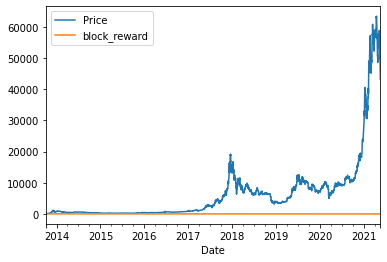

In [114]:
bitcoin_prices_block.plot()

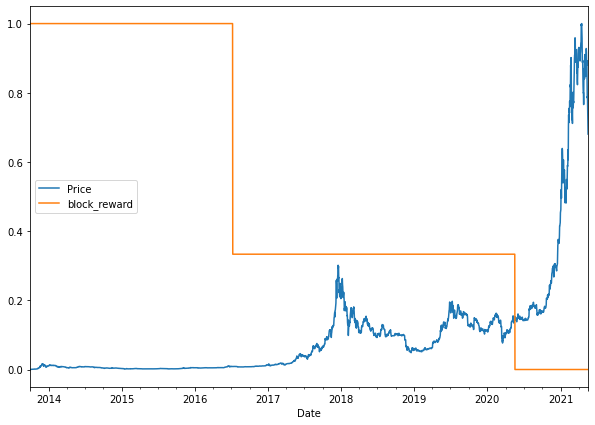

In [115]:
# Block reward ile fiyatın zamanla değişimini görselleştirmek için;(ölçüler arasındaki fark olduğundan)
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7))

## Çoklu değişken verisi için panda kullanarak windowed veriseti oluşturacağız

Daha önce univariate-tek değişkenli timse series verimizi yukarıdaki yardımcı fonksiyonu kullanarak windowed verisetine dönüştürdük. Ancak multivariate veya çoklu değişken için bu fonksiyon işimize yaramayacak. pandas.DataFrame.shift() metodunu kullanarak çoklu değişken verimizi windowed haline getirebiliriz...

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [116]:
# Verisetimizin hyperparametrelerini ayarlayalım
HORIZON = 1
WINDOW_SIZE = 7

In [117]:
# block_reward özelliğiyle Bitcoin tarihsel fiyatlarının bir kopyasını yapalım
bitcoin_prices_windowed = bitcoin_prices_block.copy()
bitcoin_prices_windowed.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [118]:
# windowed sütunları ekleyelim
for i in range(WINDOW_SIZE): # WINDOW SIZE da ki her adım için kaydırma değerleri
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


Bir panda verisetinden doğrudan verisetimize bir windowed oluşturduk. Şöyle ki;

1 haftalık WINDOW_SIZE, 1 horizon değeri ile(multivariate time series)

WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]

[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]

[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]

In [119]:
# X (windows) ve y (horizions) özelliklerini oluşturalım
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [120]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [121]:
# Train ve test seti oluşturalım indeksleyerek
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)


(2224, 2224, 556, 556)

## Model 6: Dense- Multivariate

In [122]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  #layers.Dense(128, activation="relu"), # ekstra katman ilavesi naive modelin performansını geçmesine neden olabilir
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,
            y_train,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [123]:
# En iyi performans değerini alıp değerlendirelim
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899


567.889892578125

In [124]:
# Tahminler yapalım
model_6_preds = model_6.predict(X_test)
model_6_preds[:5]

18/18 [==============================] - 0s 1ms/step


array([[8844.684],
       [8769.905],
       [9045.17 ],
       [8747.686],
       [8728.429]], dtype=float32)

In [125]:
# Tahminleri değerlendirelim
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 17148.238,
 'mse': 615102600.0,
 'rmse': 23719.365,
 'mape': 113.36508,
 'mase': 30.124704}

## Model 7: N-BEATS Algoritm

Şimdiye kadar yaptığımız en büyük ve muhtemelen en iyi performans vereceği beklentisinde olduğumuz modeli inşa edeceğiz.

https://arxiv.org/pdf/1905.10437.pdf sitesinde Figure 1'i taklit edeceğiz...

Peki neden?

* Belgedeki TensorFlow kodu kullanarak taklit edeceğiz.

* Altsınıflarda TensorFlow katmanını nasıl kullanabileceğimiz göreceğiz.(kendi özel katmanlarımızı oluşturmak için)

* Özel bir yapı oluşturmak için fonksiyonel API kullanımı deneyimi kazanacağız..

* Ve muhtemelen sorunumuza ilişkin çözüm bulacağız

### N-BEATS blok katmanı oluşturup-test edeceğiz

N-BEATS blok katmanı gibi bir layer-katman olmadığı için bunu biz oluşturacağız. Bunu oluşturmak için yani özel katman ve model oluşturmak için altsınıflandırma veya TensorFlow subclassing kullanabiliriz:

https://www.tensorflow.org/guide/keras/custom_layers_and_models



In [126]:
from tensorflow.python.ops.stateful_random_ops import THREEFRY_STATE_SIZE
# NBeatsBlock özel katmanı oluşturacağız
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): #**kwargs parent class-ana sınıfta ki diğer tüm argümanlarla ilgilenir(input_shape, trainable, name vs)
    super().__init__(**kwargs) # super().__init__ yöntemi kullanılır başlatmak için
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Belgede belirtildiği gibi her biri ReLU aktivasyonuna sahip 4 fully connected layers katmanlarını içeren blok oluşturacağız(Figure 1: Block input kısmı)
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)] # _ değişkene ihtiyacımız yok demektir. n_layers=4 tane  [tf.keras.layers.Dense(n_neurons, activation="relu")] oluşan bir liste ile bir stack oluştur demektir.
    
    # Bloğun çıktısı linear aktivasyonu ile theta katmanıdır
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")
  
  def call(self, inputs):
    x = inputs # kopyesini aldık
    for layer in self.hidden: 
      x = layer(x) # x fully connected stackta geçtiği sürece güncellenmeye devam edecek
    theta = self.theta_layer(x)

    # backcast(geriye dönük tahmin, forcast(tahmin) çıktısı
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon :]
    return backcast, forecast



Girdilerden çıktılara kadar katmanın ne yapacağını açıklayan bir çağrı yöntemine ihtiyacımız var.(def call())

Elimizde Block input- blok girdimiz (komple yani Windows'umuz var)

Modelimize univariate-tek değişkenli olarak girecek.

Bibirine tamamen bağlı stack-yığından geçecek ve çıktısı backcast ve forecast diğer iki çıktı olacak





NBeatsBlock sınıfımızı test edelim. 

Bu iş için dummy girdi ve çıktıları oluşturacağız.

In [127]:
# Girdi ve çıktıları temsil etmek için dummy NBeatsBlock katmanı hazırlayalım
tf.random.set_seed(42) # nöral ağ tabakası başlatıldığında rastgele weight aldığından random set_seed ayarladık ki çalıştırdığımızda aynı weight değeri elde edelim
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast+forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [128]:
# dummy input oluşturalım(input_size ile aynı şekilde olmak zorunda)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) # modelin input_shape' i Dense layer input gereksinimlerini yansıtmak zorunda(ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [129]:
# dummy input'u dummy NBeatsBlock katmanına geçelim
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# Bunlar theta katmanının aktivasyon çıktılarıdır(eğitilen bir veri olmadığından rastgele olacaklardır)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


### tf.data kullanarak N-Beats algoritması için Veri Hazırlayalım

Girdi verimizi mümkün olduğunca hızlı yüklemek için tf.data guide da the performant data pipeline adımlarına bağlı kalacağız

https://www.tensorflow.org/guide/data_performance

In [130]:
HORIZON = 1
WINDOWS_SIZE = 7

In [131]:
# N-Beats veri girdileri oluşturalım(N-Beats univariate-tek değişkenli zaman serilerinde çalışır)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [132]:
# Windowed sütunları ekleyelim
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [133]:
# Özellikler ve etiketleri oluşturalım
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Eğitim ve test setleri oluşturalım
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [134]:
# tf.data kullanarak performant API veri setimizi oluşturalım
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Features(özellikler) ve labels(etiketler) birlikte zip ederek biraraya getirelim-> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# batch ve prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### N-Beats Algoritm için hyperparametreleri ayarlayalım

https://arxiv.org/pdf/1905.10437.pdf Tablo 18'de ki parametreleri kullanacağız

In [135]:
# N-Beats belgesindeki değerler
N_EPOCHS = 5000 # Tablo 18 M4 -Dly sütününda iterations 5K
N_NEURONS = 512 # width -dikey(bir katmandaki nöron sayısı)
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE


(7, 8)

## Residual Connection (ResNet bağlantısı) için hazırlık yapalım
N-Beats Modelimizi kurmadan önce, residual bağlantılarımız için  iki katmana ihtiyacımız olacaktır(çıkarma ve toplama)

N-Betas algoritma belgesinde daha derin makine öğreinimine yardım etmesi için 2 tane residual stacking (küme-yığın) kullanılıyor.

bilgi için: N-BEATS paper (section 3.2) https://arxiv.org/pdf/1905.10437.pdf

ve; https://paperswithcode.com/method/resnet

In [136]:
# Tensorler yapalım
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Çıkarma
subtracted = layers.subtract([tensor_1, tensor_2])

# Ekleme
added = layers.add([tensor_1, tensor_2])

# Çıktıları alalım
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()} ")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10] 
Added: [10 12 14 16 18 20 22 24 26 28]


In [137]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

### N-BEATS Algoritmayı inşa edelim, derleyelim ve uyarlayalım

1. NBeatsBlock sınfımızı kullanarak N-BEATS Block katmanının bir instance- bir örneğini kuracağız.(ağımız için başlatıcı blok olarak kullanılacak, gerisi yığınların bir parçası olarak oluşturalacaktır.)
2. N-BEATS stack-yığını için bir girdi katmanı(input layer) oluşturacağız(Keras Functional API kullanacağız).
3. Madde 1'de oluşturduğumuz katman ile model için ilk backcast ve forceastler yap.
4. Blok katmanları yığınları oluşturmak için for loop(döngü) oluştur.
5. Backcasts ve block-level forecasts döndüren bloklar oluşturmak için for loop döngüsü içinde (4) NBeatsBlock sınıfını kullanacağız.
6. Çıkarma ve toplama katmanları kullanarak ikili residual yığın katmanı oluşturacağız.
7. tf.keras.Model() kullanarak model girdileri ve çıktılarını yükleyeceğiz.
8. Modeli MAE kayıp değeri ile derleyeceğiz(resmi belgede çoklu kayıp değeri veya multiple losses kullanıldı ancak biz diğer modellerimizle uyumu devam ettirmek adına mae kullanacağız.) ve resmi belge 5.2 ye uyumlu olarak Adam optimizer varsayılan veriyi(lr=0,001) kullanacağız.
9. Modeli uyarlayacağız 5000 epochs kullanacağız. Bu yüzden birkaç callback kullanacağız;
  * Early Stopping: eğitim süresi çok uzun olduğu için model gelişmeyi durdurduğunda eğitimi kesmek için.
  * Reduce LR on Plateau: bir model gelişmeyi durdurursa, her seferinde ağırlıklarını(weights-öğrendiği paternler) güncellediği miktarı azaltmak için öğrenmeyi düşürmeyi deneyin(en iyi performana doğru daha küçük adımlar atın).

In [138]:
%%time

tf.random.set_seed(42)

# 1. NBeatsBlock örneği kuralım (Figure 1: sol-block input)
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock") # **kwargs olduğundan bu işi üstlenecek

# 2. Yığın(stack) için input(girdi) oluştur (Figure 1:orta-stack input)
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. İlk-başlangıç backcast ve forecast oluştur(geriye doğru tahmin (backwards prediction) + horizon tahmin)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Blok katmanları yığınları oluşturalım
for i, _ in enumerate(range(N_STACKS-1)): # birinci yığını-stack 3. maddede zaten oluşturduk
  # 5. backcast ve forecast (geriye ve ileriye doğru tahminler) hesaplamak için NBeatsBlock kullanacağız
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                         theta_size=THETA_SIZE,
                                         horizon=HORIZON,
                                         n_neurons=N_NEURONS,
                                         n_layers=N_LAYERS,
                                         name= f"NBeatsBlock_{i}")(residuals) # residuals'i geçelim
  # 6. İkili residual yığın oluştur
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Stack model biraraya getirelim
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. MAE ile modeli derle
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. EarlyStopping ve ReduceLROnPlateau callbacks ile modeli uyarla-fit et.
history_model_7 = model_7.fit(train_dataset,
                              epochs=N_EPOCHS,
                              validation_data=test_dataset,
                              verbose=0,
                              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                          patience=200,
                                                                          restore_best_weights=True),
                                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                              patience=100,
                                                                              verbose=1)])
                                         
                              
                              


Epoch 990: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1219: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1319: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 35s, sys: 6.55 s, total: 3min 42s
Wall time: 3min 57s


In [139]:
# Test üzerinde değerlendirelim
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 18ms/step - loss: 574.5828


574.582763671875

In [140]:
# Tahminler yapalım
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8846.702, 8782.396, 9026.695, 8759.796, 8744.969, 8732.58 ,
       8666.094, 8498.965, 8470.18 , 8512.637], dtype=float32)>

In [141]:
# Tahminleri değerlendirelim
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)

model_7_results

{'mae': 574.58276,
 'mse': 1171227.6,
 'rmse': 1082.2327,
 'mape': 2.6111758,
 'mase': 1.0093827}

Bu, daha küçük ağların gücünü ve daha büyük modellerin hepsinin belirli bir veri türü için her zaman daha uygun olmadığı gerçeğini gösterir.

### Oluşturduğumuz N-BEATS mimarisini yapısını görselleştirelim

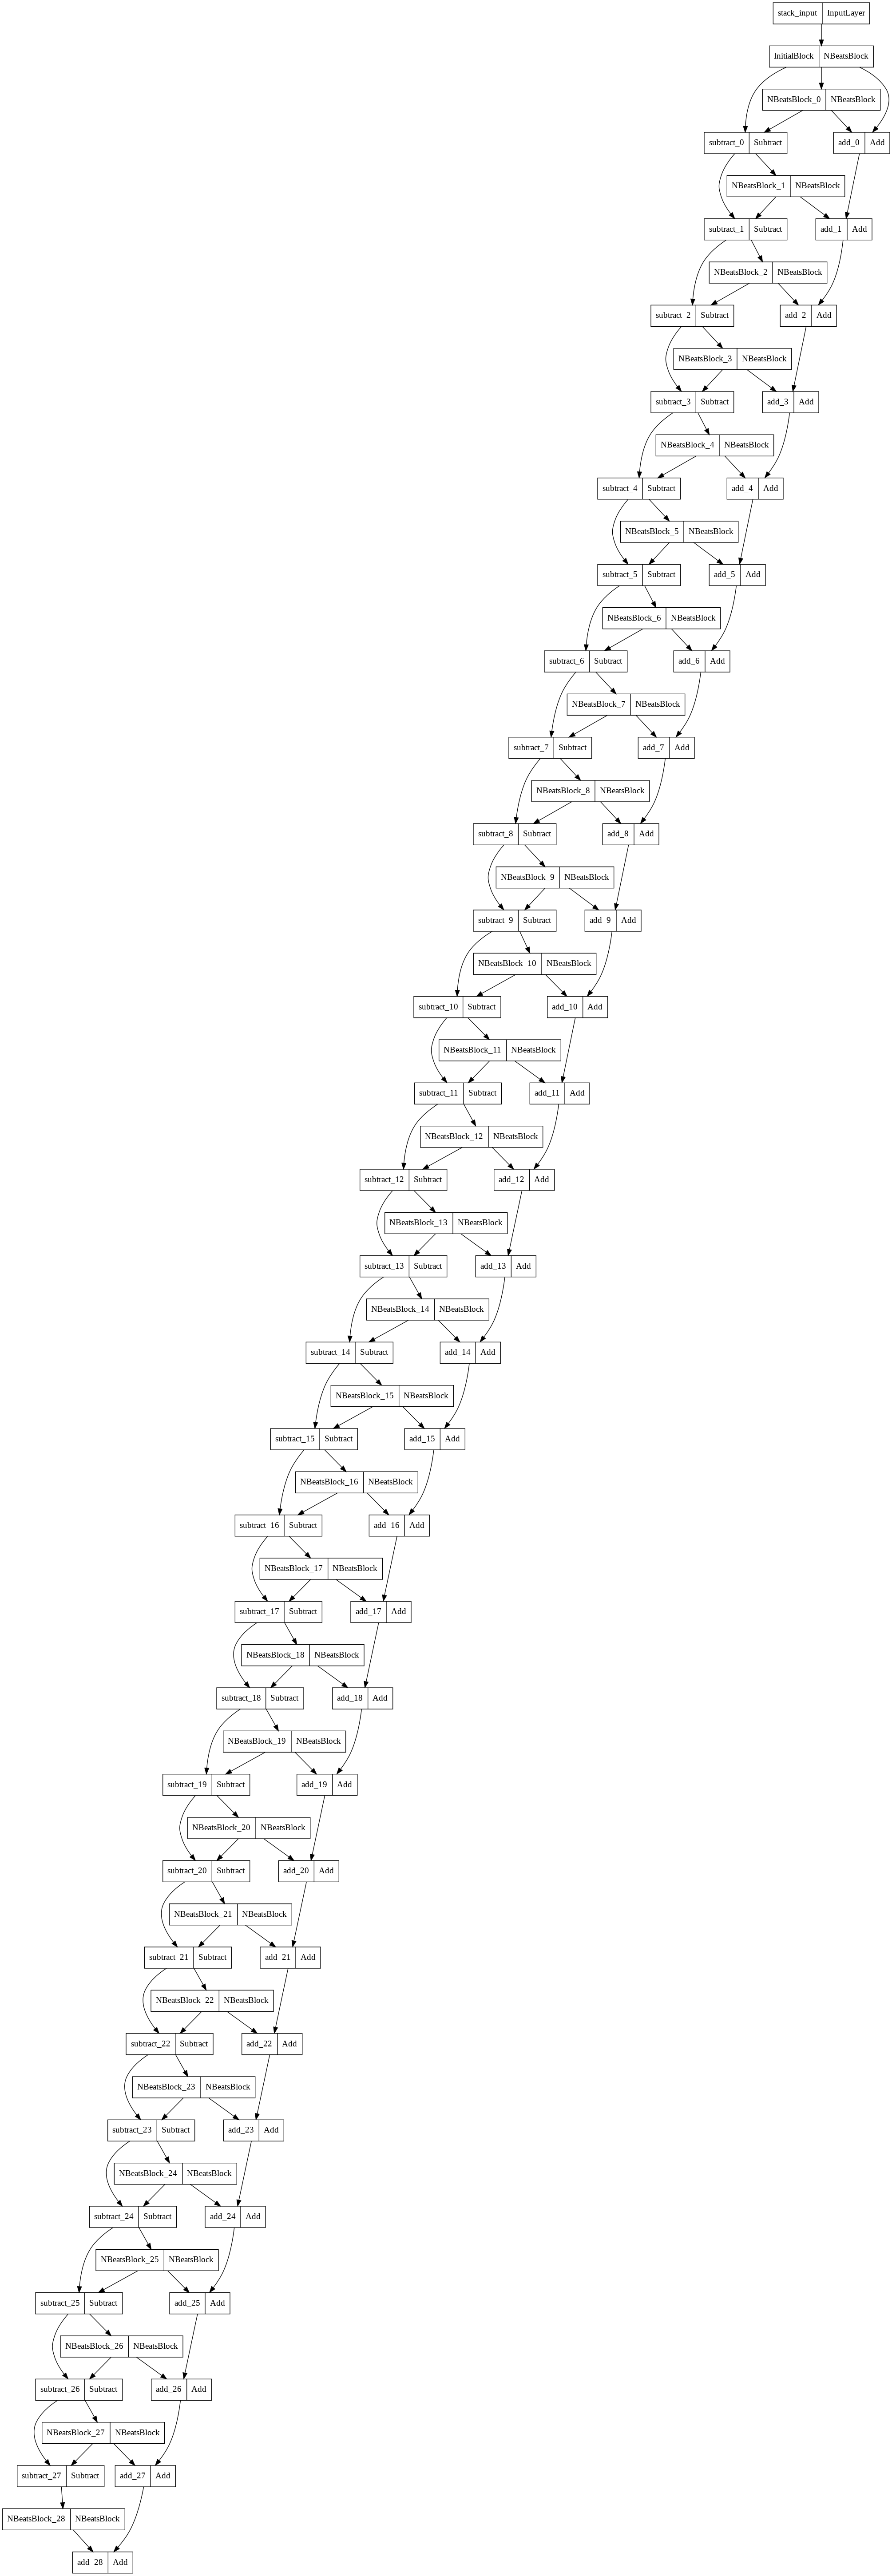

In [142]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Topluluk(ensemble- farklı modelleri yığın haline getirmek)Modeli Oluşturmak

Kalabalık etkisinin bilgeliğinden faydalanmaktır. Birçok farklı modeli ortak bir amaç için biraraya getirmektir.

### Bir topluluk modeli inşa edelim, uyarlayalım ve derleyelim (farklı kayıp değerleri kullanarak)

In [143]:
HORIZON, WINDOW_SIZE

(1, 7)

In [144]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models


In [145]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 992: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 608: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 723: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 823: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 897: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 997: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 409: ReduceLROnPl

In [146]:
ensemble_models

In [147]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [148]:

# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds



1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8751.207,  8757.172,  9040.159, ..., 50365.695, 49447.176,
        46326.17 ],
       [ 8761.605,  8738.193,  9052.355, ..., 49335.348, 48521.44 ,
        45310.465],
       [ 8745.424,  8733.034,  9101.386, ..., 49267.164, 47660.426,
        45370.047],
       ...,
       [ 8941.218,  8778.673,  9055.419, ..., 49551.77 , 49376.242,
        46582.25 ],
       [ 8728.63 ,  8805.068,  9102.533, ..., 49593.97 , 48530.668,
        45054.082],
       [ 8816.913,  8761.343,  9040.882, ..., 49727.473, 48058.516,
        45836.293]], dtype=float32)>

In [149]:
# Topluluk model tahminini değerlendirelim
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)

ensemble_results

{'mae': 579.30115,
 'mse': 1181263.1,
 'rmse': 1086.663,
 'mape': 2.6538184,
 'mase': 1.0176717}

Topluluk tahminlerimiz birden çok boyutta ortaya çıkıyor, ancak nokta tahminlerinde birleştirmek için tüm tahminlerin ortalamasından yararlanabiliyoruz.

https://www.johndcook.com/blog/2009/03/06/student-t-distribution-mean-median/

https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [150]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8788.169, 8779.333, 9066.937, 8726.803, 8739.953], dtype=float32)>

In [151]:
# Mean değerini kullanarak sonuçları değerlendirelim
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)

ensemble_results

{'mae': 567.1521,
 'mse': 1145804.4,
 'rmse': 1070.4225,
 'mape': 2.5816114,
 'mase': 0.9963291}

In [152]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:5]

array([8767.076, 8775.86 , 9055.419, 8709.416, 8738.402], dtype=float32)

In [153]:

# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 566.78674,
 'mse': 1144887.8,
 'rmse': 1069.9943,
 'mape': 2.5812619,
 'mase': 0.9956873}

## Topluluk modelimizin tahmin aralıklarını görselleştirelim(yani belirsizlik tahminleri-uncertanity estimates)

Şimdiye kadar modellerimizle nokta tahminler yaptık(tek tahmin).
Örneğin horizon=1 modelimiz yarının Bitcoin fiyatını 50 TL olacak şekilde tahmin etti.

Tahminler için belirli bir aralık seviyesi tespit etmek(tahmini yapmak) daha iyi olmaz mı?

Yani 50 tl yerine 48-50 TL aralığı gibi? Ancak gerek tek tahmin yapalım gerek aralık tahmini yapalım mutlak doğru olacak diye bir durum söz konusu değil. Olasılık doğru olabilirde olmayabilir de. 

Derin öğrenme modeli için %95 güven tahmini aralığını elde etmenin bir yolu bootstrap yöntemidir:

1. Rastgele başlatılan bir modelden bir değer al(burada ensemble_model)
2. Yaptığı tahminler standar sapmasını hesapla
3. Standart sapmayı 1.96 ile çarp(verimizin Gauisan/Normal dağılıma sahip olduğunu kabul ediyoruz-kernel_size = "he_normal" o yüzden yaptık. %95 gözlem -/+ 1.96 standart sapma averajı aralığına düşer)
4. Tahmin aralığının alt ve üst sınırını elde etmek için 3.de elde değeri 1.de yapılan mean/median değerlerine ekle ve çıkar.

In [154]:
# Topluluk tahminlerimizin alt ve üst sınırını bulacak bir fonksiyon yazalım
def get_upper_lower(preds): # 1. Rastgele başlatılan bir modelden bir değer al(burada ensemble_model)

  # 2. Tahminlerin standart sapmasını ölç
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Standart sapmayı 1.96 ile çarp
  interval = 1.96 * std

  # 4. tahmin interval-aralık alt ve üst sınırını al
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [155]:
# %95 tahmin aralığının alt ve üst sınırlarını alalım
lower, upper = get_upper_lower(preds=ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8686.706 ,  8715.827 ,  9006.837 ,  8622.1455,  8649.181 ,
         8651.44  ,  8608.866 ,  8400.212 ,  8390.604 ,  8492.635 ,
         8136.852 ,  8042.2754,  7995.87  ,  7552.127 ,  7196.0063,
         7208.018 ,  6979.4243,  7130.939 ,  7003.6753,  7463.127 ,
         7287.116 ,  7667.595 ,  7477.3306,  7297.95  ,  7263.6533,
         7254.707 ,  7150.7725,  7344.8267,  7458.1855,  7497.31  ,
         7480.1333,  7267.414 ,  7188.0957,  7147.8716,  7152.9253,
         7183.3057,  7033.306 ,  7060.0747,  6804.532 ,  6532.7915,
         7286.9707,  7052.678 ,  7064.058 ,  7166.547 ,  7113.334 ,
         7067.531 ,  7164.751 ,  7175.8027,  7148.1714,  7171.521 ,
         7268.368 ,  7342.701 ,  7192.33  ,  7120.59  ,  7131.939 ,
         6901.293 ,  7233.0376,  7271.8564,  7311.791 ,  7623.516 ,
         7978.6313,  8076.6504,  7788.1523,  8012.193 ,  8008.1763,
         8125.58  ,  8017.776 ,  8655.741 ,  8781.887 ,  8685.737 ,

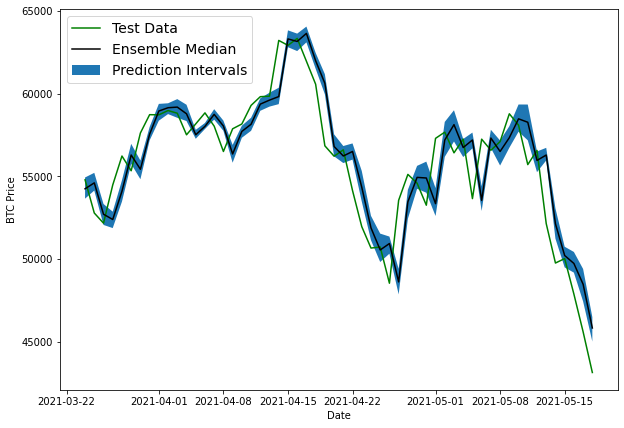

In [156]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Şu ana kadar yaptığımız tüm modellerin yaptığı tahminler test verisini gecikmeli olarak takip ediyor. Tıpkı naive_model'in taklit ediyorlar gibi yani bir önceki değerlerle sonrasını tahmin ediyor. 

**Not:** Bu tahmin aralıkları kendilerini tahmin ediyorlar. Ve modelimizin verisinin normal dağılımı izlediği varsayımına göre oluşturulmuştur. 

Modellerin aynı görselleri vermesi test verisinde overfitting- olduğuna işaret edebileceği gibi, tahmin edeceğimiz şeyin tahmin edilemez olduğuna da işaret edebilir.

##İki tür belirsizlik vardır(coconut belirsizlik/subway belirsizlik)

Makine öğrenimindeki belirsizlik tahminleri niteliksel ve niceliksel olarak aşağıdaki cevapları arar:

1. Modelim neyi bilebilir?(mükemmel veri ile bir modelin öğrenmesi için mümkün olan nedir?
2. Modelim neyi bilmiyor? (bir model neyi asla tahmin edemez? Veya bir model bir tahmin yaparken size doğru olup olmadığını aslına bilmediğini söylemesi durumunda faydalı olur mu?)

Makine öğrenimine bilmeniz gereken iki tür belirsizlik vardır:

* **Aleatoric uncertainity/rastlantısal belirsizlik-** bu belirsizlik azaltılamaz, "veri" belirsizliği ve "subway" belirsizliği olarak atıfta bulunulur.

* **Epistemic uncertainity/bilgisel belirsizlik-** bu belirsizlik azaltılabilir "model" veya "coconut" belirsizliği olarak atıfta bulunulur.

https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/

## Model 9: Gelecekle ilgili tahminler yapmak için tüm tarihi veri üzerinden bir model eğiteceğiz

Şimdiye kadar modellerimiz test verisi üzerinde tahminler yaptı ancak sadece sözde gelecekti..

Şimdi geleceği tahmin etme kapasitesinde olduğunu düşündüğümüz bir model yapacağız...

In [157]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [158]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [159]:
HORIZON = 1
WINDOW_SIZE = 7

In [160]:
# Ertesi gün için tahmin yapmak üzere tüm veri setini eğitelim
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).astype(np.float32)

# Etiketleri alalım
y_all = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

len(X_all), len(y_all)

(2780, 2780)

In [161]:
X_all[:5], y_all[:5] #numpy array tensöre çevirmemiz gerekecek

(               Price+1     Price+2     Price+3     Price+4     Price+5  \
 Date                                                                     
 2013-10-08  121.794998  120.655327  121.338661  118.674660  108.584831   
 2013-10-09  123.032997  121.794998  120.655327  121.338661  118.674660   
 2013-10-10  124.049004  123.032997  121.794998  120.655327  121.338661   
 2013-10-11  125.961159  124.049004  123.032997  121.794998  120.655327   
 2013-10-12  125.279663  125.961159  124.049004  123.032997  121.794998   
 
                Price+6     Price+7  
 Date                                
 2013-10-08  125.455002  123.654991  
 2013-10-09  108.584831  125.455002  
 2013-10-10  118.674660  108.584831  
 2013-10-11  121.338661  118.674660  
 2013-10-12  120.655327  121.338661  , Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.279663
 2013-10-12    125.927498
 Name: Price, dtype: float32)

In [162]:
# Veriyi hızlı çalışan tensörlere çevirelim
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all )
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Features ve labels'i bir veride birleştirelim
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch ve prefetch yapalım
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [163]:
tf.random.set_seed(42)

# Basit bir model yapalım(sadece test için)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)      
], name="model_9_future_model")

# Derleyelim

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
# Uyarlayalım

model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # val_data yok callbacks için o yüzden callbacks eklemedik.


In [164]:
# Gelecekte ne kadarlık bir timesteps yapacağız
INTO_FUTURE = 14


### Geleceği tahmin etmeye çalışalım

Gelecek tahmininde bulunmak için bir fonksiyon yazacağız:

1. girdi olarak almak üzere:
  * değerler listesi(Bitcoin tarihsel verisi)
  * eğitime tabi tutal bir model (model_9)
  * tahmin edeceğimiz pencere - horizion(INPUT_FUTURE değişkeni 2 haftalık 14 gün)
  * model üzerinde eğitilen bir model window size değeri ancak eğtime tabi tutulduğu şekilde bir veri üzerinde tahmin edebilir.

2. Gelecek tahminler için boş bir liste oluşturacağız(fonksiyonumuzun sonunda retur edilecektir, tahminler tamamen dolduğunda) ve girdi değerlerinden son WINDOW_SIZE çıkartacağız.

3. İlk değeri kaldırmak ve en son tahmini eklemek için güncellenen WINDOW_SIZE (çünkü window_size aynı kalmalı) veri kümelerinde bir tahmin yaparak INTO_FUTURE kez döngü yapın

 * Sonunda, modelin kendi önceki tahminleri girdi olarak kullanılarak gelecekteki tahminler yapılacaktır.


In [165]:
y_all[-WINDOW_SIZE:]

Date
2021-05-12    56573.554688
2021-05-13    52147.820312
2021-05-14    49764.132812
2021-05-15    50032.691406
2021-05-16    47885.625000
2021-05-17    45604.617188
2021-05-18    43144.472656
Name: Price, dtype: float32

In [166]:
# Geleceği tahmin etmek için bir fonksiyon kuralım
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
   Değerler sona erdikten sonra gelecek tahminlerini "gelecekteki adımlara" dönüştürür.
   float listesi olarak gelecekteki tahminleri döndürür-retur eder.
  """
  # 2. Gelecekteki tahminler/tahmin edilecek  için boş bir liste verileri hazırlayın
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Her seferinde tahmin edilen verileri değiştirerek INTO_FUTURE sayıda tahmin yapın
  for _ in range(into_future):
    # Son window da tahmin edin ve tekrar, tekrar, tekrar ekleyin (model kendi tahminleri üzerine tahmin yapmaya başlar)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Future_forecast'e tahminler ekleyin
    future_forecast.append(tf.squeeze(future_pred).numpy())
    print(future_forecast)

    # Son pencereyi yeni pred ile güncelleyin ve en son WINDOW_SIZE pred'leri alın (model, WINDOW_SIZE pencerelerde eğitilmiştir)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast


In [167]:
# Bitcoin fiyatları için gelecek tahmini yapalım
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 49ms/step
Predicting on: 
 Date
2021-05-12    56573.554688
2021-05-13    52147.820312
2021-05-14    49764.132812
2021-05-15    50032.691406
2021-05-16    47885.625000
2021-05-17    45604.617188
2021-05-18    43144.472656
Name: Price, dtype: float32 -> Prediction: 55764.47265625

[55764.473]
1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [52147.82  49764.133 50032.69  47885.625 45604.617 43144.473 55764.473] -> Prediction: 50985.9296875

[55764.473, 50985.93]
1/1 [==============================] - 0s 13ms/step
Predicting on: 
 [49764.133 50032.69  47885.625 45604.617 43144.473 55764.473 50985.93 ] -> Prediction: 48522.9609375

[55764.473, 50985.93, 48522.96]
1/1 [==============================] - 0s 14ms/step
Predicting on: 
 [50032.69  47885.625 45604.617 43144.473 55764.473 50985.93  48522.96 ] -> Prediction: 48137.19921875

[55764.473, 50985.93, 48522.96, 48137.2]
1/1 [==============================] - 0s 14ms/step
Predi

In [168]:
future_forecast

[55764.473,
 50985.93,
 48522.96,
 48137.2,
 47880.633,
 46879.715,
 48227.594,
 53963.684,
 49685.543,
 47596.176,
 48114.418,
 48807.996,
 48623.85,
 50178.715]

## Gelecek tahminlerimizi görselleştirelim

In [169]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date


The start date of our forecasted dates will be the last date of our dataset.

In [170]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [171]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

Look at that! We've now got a list of dates we can use to visualize our future Bitcoin predictions.

But to make sure the lines of the plot connect (try not running the cell below and then plotting the data to see what I mean), let's insert the last timestep and Bitcoin price of our training data to the next_time_steps and future_forecast arrays

In [172]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.473, 50985.93 , 48522.96 , 48137.2  , 47880.633,
        46879.715, 48227.594, 53963.684, 49685.543, 47596.176, 48114.418,
        48807.996, 48623.85 , 50178.715], dtype=float32))

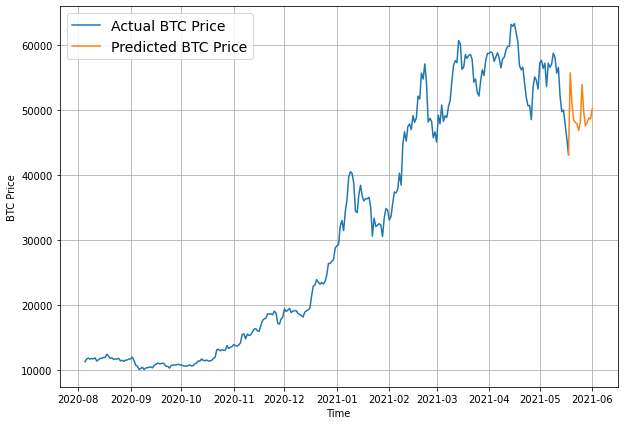

In [174]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_timeseries(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_timeseries(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")